In [166]:
import pandas as pd
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Q 1

We will preprocess the data and extract the data we want, according to the following sentence:

- **Score lead**. We believe that the difference in scores in the current game will significantly affect the player's mentality and indirectly affect the player's cash flow.

- **Stamina**. In the provided data set, we can measure the player's current physical strength through the distance traveled by the player.
- **Score streak**. We believe that whether consecutive points are scored in a game is also an important factor affecting a player's performance.
- **Mentality**. Losing points due to certain things during the game will affect the performance of the players, thereby indirectly affecting the performance.

Therefore, we will process the original data to obtain the following **evaluation indicators**:

|     evaluation indicators      |      Lable      |
| :----------------------------: | :-------------: |
|           Score lead           |   points_diff   |
| Running distance in this match | total_distance  |
|          Score streak          |  points_streak  |
|         unforced error         |     unf_err     |
|        Whether to serve        |     server      |
|     serve score(untouched)     |   serve_score   |
|      Last round duration       | elapsed_time_td |
|                                |                 |

In [173]:
path = 'E:\MEM-Problem-C\data\data_processed.csv'
dataset = pd.read_csv(path)
dataset = dataset.drop(['match_id'], axis=1) # dataset drop了match_id这一列
data = pd.read_csv(path)
dataset = dataset[300:] # dataset目前剔除了第一把比赛的数据
data # data目前是所有数据
print(dataset)

      p1_diffp  p1_distance_run  p1_win_streak  p1_unf_err  p1_serve  p1_ace  \
300          0           13.646              0           0         0       0   
301          1            6.596              1           0         0       0   
302          0           72.403              0           0         0       0   
303         -1           17.565              0           0         0       0   
304          0            3.195              1           0         0       0   
...        ...              ...            ...         ...       ...     ...   
7279        -1           38.620              0           0         1       0   
7280         0           17.533              1           0         1       0   
7281         1           10.882              2           0         1       0   
7282         0            7.893              0           0         1       0   
7283         1           17.811              1           0         1       0   

      elapsed_time  p1_net_pt_won  p1_l

In [165]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # 最大最小操作，映射到[0, 1]区间
columns = dataset.columns[:-1] # 取出dataset的除了label的所有列名称
print(columns)
scaler.fit(dataset[columns].values) # 学习除了label那一列，每列的最大最小值
dataset[columns] = scaler.transform(dataset[columns].values) # 对除了label的每列，根据之前计算的最大最小值，进行归一化操作
dataset.to_excel('tar_data.xlsx',index=False) # 导出归一化的数据excel表格

Index(['p1_diffp', 'p1_distance_run', 'p1_win_streak', 'p1_unf_err',
       'p1_serve', 'p1_ace', 'elapsed_time', 'p1_net_pt_won'],
      dtype='object')


In [171]:
import warnings
warnings.filterwarnings("ignore")
# 定义了evaluate函数，该函数用于评估模型在5重交叉验证下的性能，并返回5个评估指标的平均值
def evaluate(model):
    auc = round(cross_val_score(model,dataset[columns].values,dataset['p1_label'].values, cv=5,scoring='roc_auc').mean(),2)
    acc = round(cross_val_score(model,dataset[columns].values,dataset['p1_label'].values, cv=5,scoring='accuracy').mean(),2)
    recall = round(cross_val_score(model,dataset[columns].values,dataset['p1_label'].values, cv=5,scoring='recall').mean(),2)
    precision = round(cross_val_score(model,dataset[columns].values,dataset['p1_label'].values, cv=5,scoring='precision').mean(),2)
    f1 = round(cross_val_score(model,dataset[columns].values,dataset['p1_label'].values, cv=5,scoring='f1').mean(),2)
    return acc,recall,precision,f1,auc

model = LGBMClassifier(random_state=30,force_col_wise=True)
print(f'LGBMClassifier acc,recall,precision,f1,auc :{evaluate(model)}')
model = XGBClassifier(random_state=50)
print(f'XGBClassifier acc,recall,precision,f1,auc :{evaluate(model)}')
model = SVC(random_state=50)
print(f'SVC acc,recall,precision,f1,auc :{evaluate(model)}')
model = MLPClassifier(random_state=5)
print(f'MLPClassifier acc,recall,precision,f1,auc :{evaluate(model)}')
model = LogisticRegression(random_state=50)
print(f'LogisticRegression acc,recall,precision,f1,auc :{evaluate(model)}')
model = DecisionTreeClassifier(random_state=50)
print(f'DecisionTreeClassifier acc,recall,precision,f1,auc :{evaluate(model)}')
model = RandomForestClassifier(random_state=50)
print(f'RandomForestClassifier acc,recall,precision,f1,auc :{evaluate(model)}')
model = GaussianNB()
print(f'GaussianNB acc,recall,precision,f1,auc :{evaluate(model)}')

[LightGBM] [Info] Number of positive: 2848, number of negative: 2739
[LightGBM] [Info] Total Bins 423
[LightGBM] [Info] Number of data points in the train set: 5587, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.509755 -> initscore=0.039024
[LightGBM] [Info] Start training from score 0.039024
[LightGBM] [Info] Number of positive: 2848, number of negative: 2739
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 5587, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.509755 -> initscore=0.039024
[LightGBM] [Info] Start training from score 0.039024
[LightGBM] [Info] Number of positive: 2848, number of negative: 2739
[LightGBM] [Info] Total Bins 425
[LightGBM] [Info] Number of data points in the train set: 5587, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.509755 -> initscore=0.039024
[LightGBM] [Info] Start training from score 0.039024
[LightGBM] [Info] Number 

[LightGBM] [Info] Number of positive: 2857, number of negative: 2730
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000377 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 421
[LightGBM] [Info] Number of data points in the train set: 5587, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.511366 -> initscore=0.045471
[LightGBM] [Info] Start training from score 0.045471


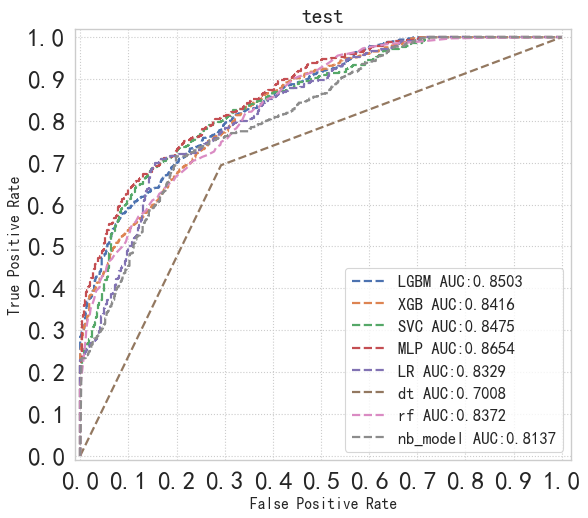

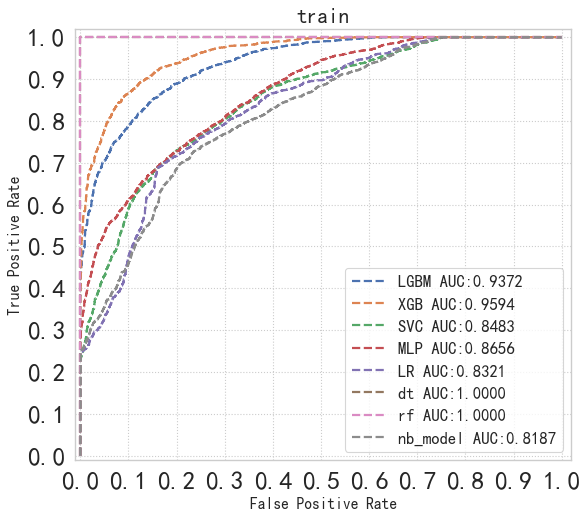

In [172]:
import numpy as np
from  sklearn import metrics


def draw(model_list,name_list,types='train'):
    plt.figure(figsize=(8, 7), dpi=80, facecolor='w')    # dpi:每英寸长度的像素点数；facecolor 背景颜色
    plt.xlim((-0.01, 1.02))  # x,y 轴刻度的范围
    plt.ylim((-0.01, 1.02))
    plt.xticks(np.arange(0, 1.1, 0.1))  #绘制刻度
    plt.yticks(np.arange(0, 1.1, 0.1))

    if types == 'test':
        for model,name in zip(model_list,name_list):
            ytest_prob = model.predict_proba(xvalid)[:,1]
            fpr, tpr, _ = metrics.roc_curve(yvalid, ytest_prob)
            auc = metrics.auc(fpr, tpr)
            plt.plot(fpr, tpr, '--', lw=2, label=f'{name} AUC:%.4f' % auc)  # 绘制AUC 曲线
    else:
        for model,name in zip(model_list,name_list):
            ytest_prob = model.predict_proba(xtrain)[:,1]
            fpr, tpr, _ = metrics.roc_curve(ytrain, ytest_prob)
            auc = metrics.auc(fpr, tpr)
            plt.plot(fpr, tpr, '--', lw=2, label=f'{name} AUC:%.4f' % auc)  # 绘制AUC 曲线
    plt.legend(loc='lower right',fontsize=15)    # 设置显示标签的位置
    plt.xlabel('False Positive Rate', fontsize=14)   #绘制x,y 坐标轴对应的标签
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.tick_params(labelsize=23)

    plt.grid(True, ls=':')  # 绘制网格作为底板;b是否显示网格线；ls表示line style
    plt.savefig(f'results\\roc_auc({types}).png',dpi=500)
    plt.title(types)
    plt.show()

# 划分训练集和测试集，训练集(5587row)：测试集(1397)=8：2
xtrain, xvalid, ytrain, yvalid = train_test_split(dataset[columns].values,dataset['p1_label'].values,random_state=620,test_size=0.2)

model1 = LGBMClassifier(random_state=30)
model2 = XGBClassifier(random_state=50)
model3 = SVC(probability=True,random_state=50)
model4 = MLPClassifier(random_state=5)
model5 = LogisticRegression(random_state=50)
dt_model = DecisionTreeClassifier(random_state=50)
rf_model = RandomForestClassifier(random_state=40)
nb_model = GaussianNB()


# 随机森林

model1.fit(xtrain,ytrain)
model2.fit(xtrain,ytrain)
model3.fit(xtrain,ytrain)
model4.fit(xtrain,ytrain)
model5.fit(xtrain,ytrain)
dt_model.fit(xtrain, ytrain)
rf_model.fit(xtrain, ytrain)
nb_model.fit(xtrain, ytrain)

draw([model1,model2,model3,model4,model5, dt_model, rf_model, nb_model],['LGBM','XGB','SVC','MLP','LR', 'dt', 'rf', 'nb_model'],'test')
draw([model1,model2,model3,model4,model5, dt_model, rf_model, nb_model],['LGBM','XGB','SVC','MLP','LR', 'dt', 'rf', 'nb_model'],'train')

We comprehensively compared the training results of LGBM, XGBC, SVM, MLP, Logistic Regression, Decision Tree, Random Forest, Naive Bayes and other models.

It was found that the MLP model has the best prediction result, so we choose the MLP model for the 30th game 2023-wimbledon-1301
 Make predictions and get performance graphs

In [183]:
index = data[data.match_id==0].index # 取出第一场比赛的索引列表
test = data.iloc[index] # 从预处理数据中取出第一场比赛，用来验证模型
print(index)
train = data.drop(index,axis=0) # 从原数据中剔除第一场比赛的三百条记录作为训练数据集
model = MLPClassifier(random_state=5) # 实例化神经网络模型
model.fit(train[columns].values,train['p1_label'].values) # 训练模型
pred = model.predict_proba(test[columns].values) # 得到每一行输出在0和1的概率，第一列表示0的概率，第二列表示1的概率
pred = pd.DataFrame({'score':pred[:,1]}) # 0的概率表示输球概率，1的概率表示赢球概率，因此只取处pred列表的第二列
pred_01 = model.predict(test[columns].values)
pred_01 = pd.DataFrame(pred_01)

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       290, 291, 292, 293, 294, 295, 296, 297, 298, 299],
      dtype='int64', length=300)


In [190]:
pred

,score
0,0.008797
1,0.925446
2,0.020093
3,0.663575
4,0.999003
...,...
295,0.943499
296,0.729444
297,0.956729
298,0.832346


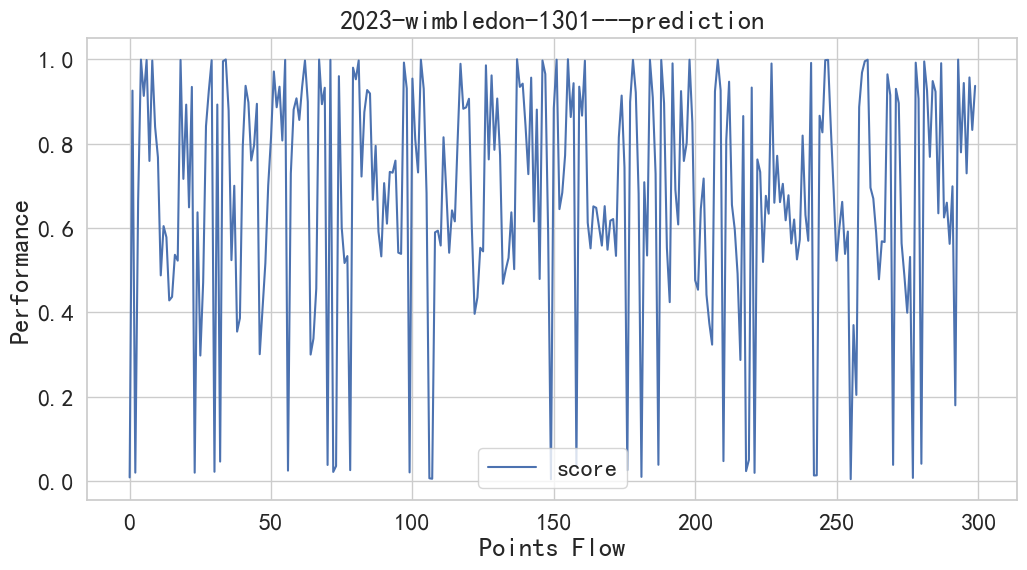

In [188]:
import seaborn as sns
sns.set(font= "simhei",style="whitegrid",font_scale=1.6)
import matplotlib
matplotlib.rcParams['axes.unicode_minus']=False # 解决坐标轴的负号显示问题
import matplotlib.pyplot as plt


pred.plot(kind = "line",figsize = (12,6)) #颜色,matplotlib
plt.xticks(rotation=0)
plt.xlabel("Points Flow")
plt.ylabel("Performance")
plt.title('2023-wimbledon-1301---prediction')
plt.savefig('results\\match_flow_prediction.png',dpi=500)
plt.show()

Then, in order to find the weight relationship between features and results, we focused on analyzing the LGBM and LR models, and obtained the following two feature weight maps

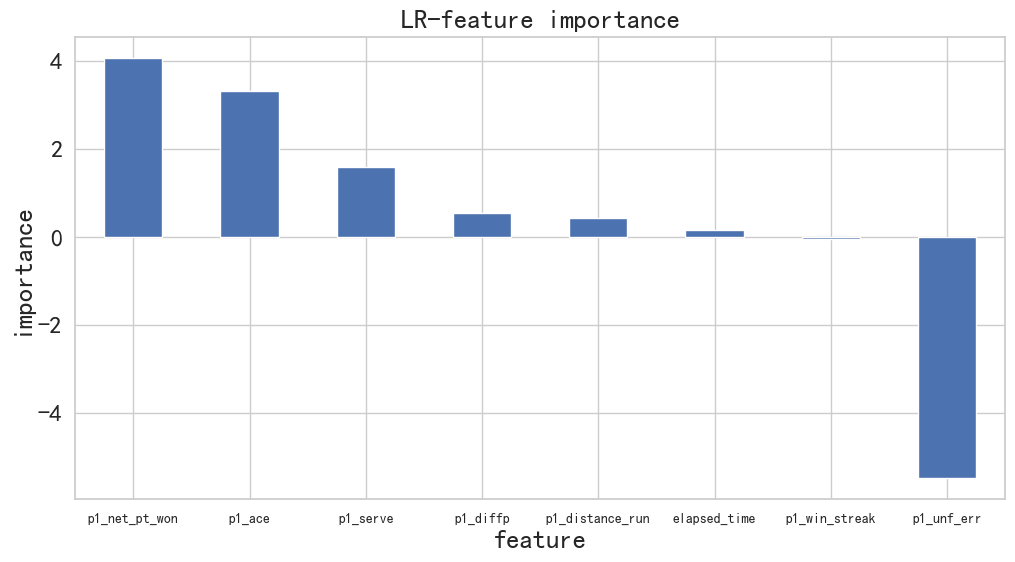

In [191]:
import seaborn as sns
sns.set(font= "simhei",style="whitegrid",font_scale=1.6)
import matplotlib
matplotlib.rcParams['axes.unicode_minus']=False # 解决坐标轴的负号显示问题
import matplotlib.pyplot as plt
import plotly.express as px

#输出重要性得分
f = pd.DataFrame({'col':list(columns),'score':model5.coef_[0]}).sort_values(by='score',ascending=False)
f.index = f['col']
f["score"].plot(kind = "bar",figsize = (12,6)) #颜色,matplotlib
plt.xlabel("feature")
plt.ylabel("importance")
plt.xticks(rotation = 0,fontsize = 10)
plt.title('LR-feature importance')
plt.savefig('results\\LR-feature importance.png',dpi=500,bbox_inches='tight')
plt.show()

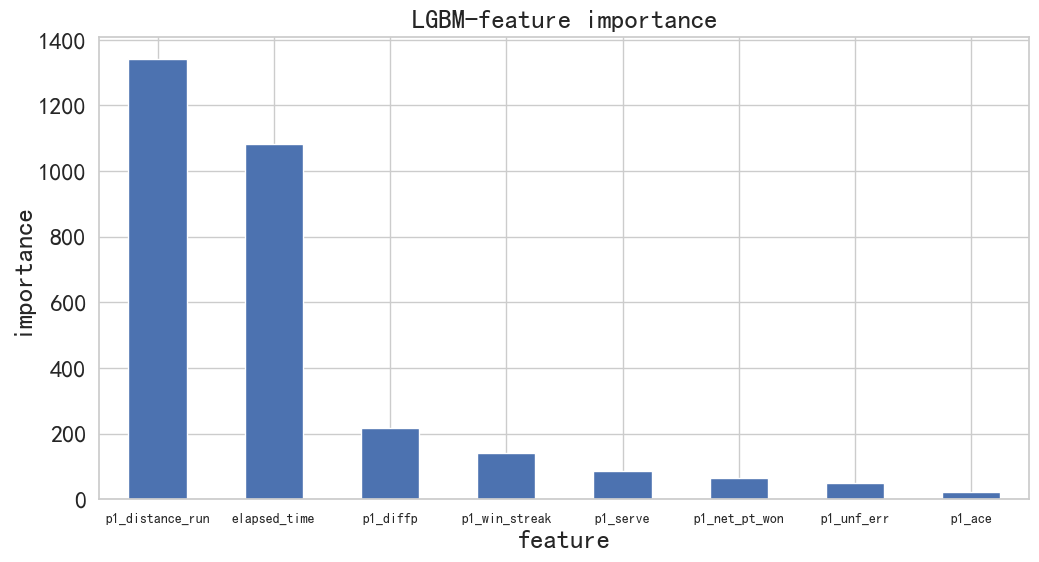

In [192]:
import seaborn as sns
sns.set(font= "simhei",style="whitegrid",font_scale=1.6)
import matplotlib
matplotlib.rcParams['axes.unicode_minus']=False # 解决坐标轴的负号显示问题
import matplotlib.pyplot as plt
import plotly.express as px

#输出重要性得分
f = pd.DataFrame({'col':list(columns),'score':model1.feature_importances_}).sort_values(by='score',ascending=False)
f.index = f['col']
f["score"].plot(kind = "bar",figsize = (12,6)) #颜色,matplotlib
plt.xlabel("feature")
plt.ylabel("importance")
plt.xticks(rotation = 0,fontsize = 10)
plt.title('LGBM-feature importance')
plt.savefig('results\\LGBM-feature importance.png',dpi=500,bbox_inches='tight')
plt.show()

# Q 2

A tennis coach is skeptical that “momentum” plays any role in the match. Instead, he postulates that swings in play and runs of success by one player are random. Use your model/metric to assess this claim.

In order to **refute** the coach's hypothesis, we used the **momentum prediction** results in Q1 for the first and game 2023-wimbledon-1301 to conduct **correlation analysis** with the real values, and obtained the following results:

Pearson相关系数：0.6033196021804539
P值：3.954501509560836e-31


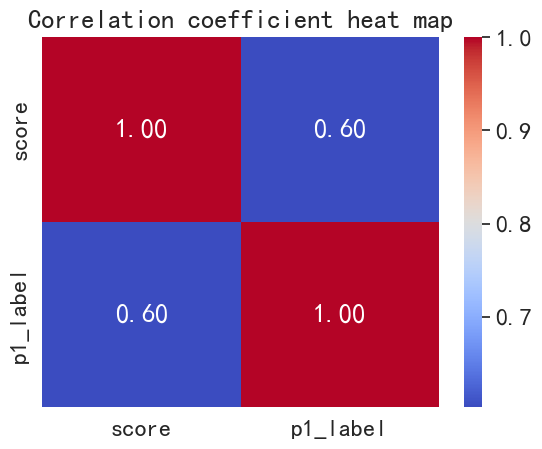

In [162]:
from scipy.stats import pearsonr

data1 = pd.read_csv('pred.csv')
correlation_coefficient, p_value = pearsonr(data1['score'], data1['p1_label'])
correlation_matrix = data1.corr()
# 打印结果
print(f"Pearson相关系数：{correlation_coefficient}")
print(f"P值：{p_value}")
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation coefficient heat map')
plt.savefig('results\\Correlation coefficient heat map.png',dpi=500,bbox_inches='tight')
plt.show()

The above figure shows that the size of p is e raised to the power of -31, so there is a **significant correlation** between
momentum and point_victor. This obviously strongly proves that the view that score changes during the game are random is wrong. In
addition, the correlation coefficient between momentum and point_victor analyzed by pearson correlation is 0.6, so there is a
**positive correlation**.

In [144]:
mdata = pd.read_csv('momentum.csv')
mdata['momentum'] = pd.DataFrame()
mdata

ValueError: Cannot set a DataFrame without columns to the column momentum